## Income Group Classification

## Context 

DeltaSquare is an NGO that works with the Government on matters of social policy to bring about a change in the lives of underprivileged sections of society. The NGO is working on improving the policies with respect to the income of the needful people so that workers can be paid according to the work and also introduce some programs to enhance the skills of the work which will eventually help in the overall development of the nation. The NGO has received the dataset by the government and needs to be analyzed thoroughly. You as a data scientist at DeltaSquare are tasked with solving this problem and sharing a proposal with the government. 


### Objective

1. Understand the different factors that influence the income of an individual.
2. To build a prediction model that can help the government formulate policies for the right pockets of the society.


### Data Dictionary

The data contains characteristics of the people

* `age`: continuous - age of a Person 
* `workclass`: Where does a person works - categorical -Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* `fnlwgt`: continuous - Weight assigned by Current Population Survey (CPS) - People with similar demographic characteristics should have similar weights since it is a feature aimed to allocate similar weights to people with similar demographic characteristics.
* `education`: Degree the person has - Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* `education-num`: no. of years a person studied - continuous.
* `marital-status`: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* `occupation`: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* `relationship` : Relationship of the person with the dependent member. Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* `race`: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* `sex`: Female, Male.
* `capital-gain`: Investment gain of the person other than salary - continuous
* `capital-loss`: Loss from investments - continuous
* `hours-per-week`: No. of hours a person works - continuous.
* `native-country`: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinidad&Tobago, Peru, Hong, Holand-Netherlands.
* `salary`: >50K, <=50K (dependent variable, the salary is in Dollars per year)

### Loading Libraries

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction

from sklearn.linear_model import LogisticRegression

s
# To get diferent metric scores

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)

<IPython.core.display.Javascript object>

### Load data

In [2]:
who = pd.read_csv("who_data.csv")

<IPython.core.display.Javascript object>

In [3]:
# copying data to another variable to avoid any changes to original data
data = who.copy()

<IPython.core.display.Javascript object>

### View the first and last 5 rows of the dataset.

In [4]:
data.head()

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<IPython.core.display.Javascript object>

### Understand the shape of the dataset.

In [5]:
data.shape

(32561, 15)

<IPython.core.display.Javascript object>

* The dataset has 32561 rows and 14 columns 

#### Let's create a list of numerical and categorical columns

In [6]:
numeric_cols = data.select_dtypes(include=[np.number]).columns
cat_cols = data.describe(include=["object"]).columns
print("Categorical Columns:     ", cat_cols)
print("Numeric Columns:    ", numeric_cols)

Categorical Columns:      Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'salary'],
      dtype='object')
Numeric Columns:     Index(['age', 'fnlwgt', 'education_no_of_years', 'capital_gain',
       'capital_loss', 'working_hours_per_week'],
      dtype='object')


<IPython.core.display.Javascript object>

#### Summary of the numerical data

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education_no_of_years,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital_gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
working_hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


<IPython.core.display.Javascript object>

* `age`: Average age of people in the dataset is 38 years, age has a wide range from 17 to 90 years.
* `education_no_of_years`: The average education in years is 10 years. There's a large difference between the minimum value and 25th percentile which indicates that there might be outliers present in this variable.
* `capital_gain`: There's a huge difference in the 75th percentile and maximum value of capital_gain indicating the presence of outliers. Also, 75% of the observations are 0.
* `capital_loss`: Same as capital gain there's a huge difference in the 75th percentile and maximum value indicating the presence of outliers. Also, 75% of the observations are 0.
* `working_hours_per_week`: On average people work for 40 hours a week. A vast difference in minimum value and 25th percentile, as well as 75th percentile and the maximum value, indicates that there might be outliers present in the variable.

#### Checking different levels in categorical data

In [8]:
# Checking value counts of categorical variables
for i in cat_cols:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)
    print(data[i].value_counts(1))
    print("*" * 50)

Unique values in workclass are :
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
**************************************************
 Private             0.697030
 Self-emp-not-inc    0.078038
 Local-gov           0.064279
 ?                   0.056386
 State-gov           0.039864
 Self-emp-inc        0.034274
 Federal-gov         0.029483
 Without-pay         0.000430
 Never-worked        0.000215
Name: workclass, dtype: float64
**************************************************
Unique values in education are :
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12t

<IPython.core.display.Javascript object>

* There are some values represented by a '?' in workclass, occupation, and native country columns which we should investigate further.
* There are many distinct values in native_country that can be reduced to their respective continents.
* The distinct levels of marital_status can also be reduced.

#### Data Cleaning

#### We can assume that wherever there is a ? the data is unknown or missing. Let us see if there is a pattern in the missingness.

#### workclass

In [9]:
data[data["workclass"] == " ?"].sample(5)

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
9577,35,?,119006,HS-grad,9,Widowed,?,Own-child,White,Female,0,0,38,United-States,<=50K
2356,22,?,196943,Some-college,10,Separated,?,Own-child,White,Male,0,0,25,United-States,<=50K
29614,25,?,219897,Masters,14,Never-married,?,Not-in-family,White,Female,0,0,35,Canada,<=50K
13646,62,?,129246,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,<=50K
16130,20,?,369678,HS-grad,9,Never-married,?,Not-in-family,Other,Male,0,0,43,United-States,<=50K


<IPython.core.display.Javascript object>

* From the sample it looks like wherever workclass is missing occupation is also missing. 
* It looks like for ? observations in workclass the native country is the United States.
* Let's see if the above observations hold.

In [10]:
data[data["workclass"] == " ?"]["occupation"].value_counts()

 ?    1836
Name: occupation, dtype: int64

<IPython.core.display.Javascript object>

* It is indeed true that wherever workclass has ? the occupation is also ?
* This indicates there is a strong pattern in the missingness of workclass and occupation. This is intuitive as well because both the columns are capturing similar information.

In [11]:
data[data["workclass"] == " ?"]["native_country"].value_counts()

 United-States         1659
 Mexico                  33
 ?                       27
 Canada                  14
 Philippines             10
 South                    9
 Germany                  9
 Taiwan                   9
 China                    7
 El-Salvador              6
 Italy                    5
 Puerto-Rico              5
 Poland                   4
 England                  4
 Portugal                 3
 Columbia                 3
 Vietnam                  3
 Dominican-Republic       3
 Japan                    3
 Cuba                     3
 Haiti                    2
 France                   2
 Ecuador                  1
 Peru                     1
 Cambodia                 1
 Thailand                 1
 Honduras                 1
 Laos                     1
 Hong                     1
 Guatemala                1
 Trinadad&Tobago          1
 Iran                     1
 Nicaragua                1
 Jamaica                  1
 Scotland                 1
Name: native_country

<IPython.core.display.Javascript object>

* The above observations don't hold for native_country as there many other countries where the observations are ?.

#### occupation

In [12]:
data[data["occupation"] == " ?"].sample(5)

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
23936,19,?,217194,10th,6,Never-married,?,Own-child,White,Male,0,0,30,United-States,<=50K
4812,69,?,164102,HS-grad,9,Divorced,?,Not-in-family,White,Female,0,0,40,United-States,>50K
30208,17,?,34019,10th,6,Never-married,?,Own-child,White,Male,0,0,20,United-States,<=50K
8805,20,?,216563,11th,7,Never-married,?,Other-relative,White,Male,0,0,40,United-States,<=50K
30061,33,?,393376,11th,7,Never-married,?,Not-in-family,White,Female,0,0,40,United-States,<=50K


<IPython.core.display.Javascript object>

In [13]:
data[data["occupation"] == " ?"]["workclass"].value_counts()

 ?               1836
 Never-worked       7
Name: workclass, dtype: int64

<IPython.core.display.Javascript object>

* We observe the same pattern here, where occupation is ? most of the values in workclass are ?.

In [14]:
data[data["occupation"] == " ?"]["native_country"].value_counts()

 United-States         1666
 Mexico                  33
 ?                       27
 Canada                  14
 Philippines             10
 South                    9
 Germany                  9
 Taiwan                   9
 China                    7
 El-Salvador              6
 Italy                    5
 Puerto-Rico              5
 Poland                   4
 England                  4
 Portugal                 3
 Columbia                 3
 Vietnam                  3
 Dominican-Republic       3
 Japan                    3
 Cuba                     3
 Haiti                    2
 France                   2
 Ecuador                  1
 Peru                     1
 Cambodia                 1
 Thailand                 1
 Honduras                 1
 Laos                     1
 Hong                     1
 Guatemala                1
 Trinadad&Tobago          1
 Iran                     1
 Nicaragua                1
 Jamaica                  1
 Scotland                 1
Name: native_country

<IPython.core.display.Javascript object>

* The native_country column has other countries where the observations are ? corresponding to ?s in occupation.

#### native_country

In [15]:
data[data["native_country"] == " ?"].sample(5)

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
30230,20,Private,178469,HS-grad,9,Never-married,Other-service,Own-child,Asian-Pac-Islander,Female,0,0,15,?,<=50K
16381,20,Private,219835,Some-college,10,Never-married,Sales,Own-child,White,Male,0,0,30,?,<=50K
28220,70,Private,237065,5th-6th,3,Widowed,Other-service,Other-relative,White,Female,2346,0,40,?,<=50K
15678,42,Self-emp-not-inc,183765,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,50,?,<=50K
8477,24,Private,178255,Some-college,10,Married-civ-spouse,Priv-house-serv,Wife,White,Female,0,0,40,?,<=50K


<IPython.core.display.Javascript object>

In [16]:
data[data["native_country"] == " ?"]["occupation"].value_counts()

 Prof-specialty       102
 Other-service         83
 Exec-managerial       74
 Craft-repair          69
 Sales                 66
 Adm-clerical          49
 Machine-op-inspct     36
 ?                     27
 Transport-moving      25
 Handlers-cleaners     20
 Tech-support          16
 Priv-house-serv        6
 Farming-fishing        5
 Protective-serv        5
Name: occupation, dtype: int64

<IPython.core.display.Javascript object>

In [17]:
data[data["native_country"] == " ?"]["workclass"].value_counts()

 Private             410
 Self-emp-not-inc     42
 Self-emp-inc         42
 ?                    27
 Local-gov            26
 State-gov            19
 Federal-gov          17
Name: workclass, dtype: int64

<IPython.core.display.Javascript object>

* There is no clear pattern here.

#### Observations:
* We observe that all the observations where workclass = ? the values in the occupation are ? 
* The strong pattern between workclass and occupation makes sense as both of these variables capture similar information.
* There is no strong correlation of ? observations in occupation and workclass with native_country.
* For now we will replace these ?'s with the 'unknown' category.

#### Replacing ? with 'Unknown'

In [18]:
data.workclass = data.workclass.apply(lambda x: "Unknown" if x == " ?" else x)
data.native_country = data.native_country.apply(lambda x: "Unknown" if x == " ?" else x)
data.occupation = data.occupation.apply(lambda x: "Unknown" if x == " ?" else x)

<IPython.core.display.Javascript object>

#### Mapping countries to continents to reduce the number of unique values.

In [19]:
data.native_country.nunique()

42

<IPython.core.display.Javascript object>

* There are 42 distinct countries in the data set, we can reduce them to their respective continents as this will help us reduce the dimension of data.

In [20]:
data.native_country = data.native_country.str.replace(
    " ", ""
)  # remove empty spaces from strings

<IPython.core.display.Javascript object>

In [21]:
north_america = [
    "Canada",
    "Cuba",
    "Dominican-Republic",
    "El-Salvador",
    "Guatemala",
    "Haiti",
    "Honduras",
    "Jamaica",
    "Mexico",
    "Nicaragua",
    "Outlying-US(Guam-USVI-etc)",
    "Puerto-Rico",
    "Trinadad&Tobago",
    "United-States",
]
asia = [
    "Cambodia",
    "China",
    "Hong",
    "India",
    "Iran",
    "Japan",
    "Laos",
    "Philippines",
    "Taiwan",
    "Thailand",
    "Vietnam",
]
south_america = ["Columbia", "Ecuador", "Peru"]
europe = [
    "England",
    "France",
    "Germany",
    "Greece",
    "Holand-Netherlands",
    "Hungary",
    "Ireland",
    "Italy",
    "Poland",
    "Portugal",
    "Scotland",
    "Yugoslavia",
]
other = ["South", "Unknown", "?"]

<IPython.core.display.Javascript object>

In [22]:
def region_combining(x):
    if x in north_america:
        return "north_america"
    elif x in asia:
        return "asia"
    elif x in south_america:
        return "south_america"
    elif x in europe:
        return "europe"
    elif x in other:
        return "other"
    else:
        return x

<IPython.core.display.Javascript object>

In [23]:
data["native_country"] = data["native_country"].apply(region_combining)

<IPython.core.display.Javascript object>

In [24]:
print("Distinct values in Native Country column:", data.native_country.nunique())

Distinct values in Native Country column: 5


<IPython.core.display.Javascript object>

#### Reducing the number of distinct values in marital_status

In [25]:
data.marital_status.unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

<IPython.core.display.Javascript object>

We can reduce these values into the following groups:
* Married
* Not-Married
* Never-Married

In [26]:
data.marital_status = data.marital_status.str.replace(
    " ", ""
)  # remove empty spaces from strings

married = ["Married-civ-spouse", "Married-AF-spouse"]
not_married = ["Divorced", "Separated", "Widowed", "Married-spouse-absent"]


def reduce_marital_status(x):
    if x in married:
        return "married"
    elif x in not_married:
        return "not_married"
    else:
        return x

<IPython.core.display.Javascript object>

In [27]:
data.marital_status = data.marital_status.apply(reduce_marital_status)

<IPython.core.display.Javascript object>

In [28]:
data.marital_status.unique()

array(['Never-married', 'married', 'not_married'], dtype=object)

<IPython.core.display.Javascript object>

* Values have been clubbed into three categories.

In [29]:
df_clean = data.copy()

<IPython.core.display.Javascript object>

#### Let's explore the data in depth


### Note: The EDA section of the notebook has been covered multiple times in the previous case studies. For this discussion, EDA section can be skipped and we can refer to the **<a href = #link>EDA summary</a>** below. For the detailed EDA, **<a href = #link1>Appendix Section</a>** can be referred. 

#### The below three functions need to be defined to carry out the Exploratory Data Analysis.

In [30]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [31]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

In [32]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

<a id='eda'></a>
### <a id='link'>Summary of EDA</a>
**Data Description:**

* Dependent variable is the salary which is of categorical data type.
* age, capital gain, and capital loss are of integer type while other variables are of categorical type
* There are no missing values in the dataset.

**Data Cleaning:**

* We observed that all the observations where workclass = ? the values in the occupation are ? 
* The strong pattern between workclass and occupation makes sense as both of these variables capture similar information.
* There is no strong correlation of ? observations in occupation and workclass with native_country.
* For now we will replaced these ?'s with the 'unknown' category.
* There are 42 distinct countries in the data set, which were reduced to their respective continents to reduce the dimension of data and we now have only 5 distinct values in the data.
* We reduced the distinct groups of marital_status to three categories: Married, Not-Married and Never-Married.

**Observations from EDA:**



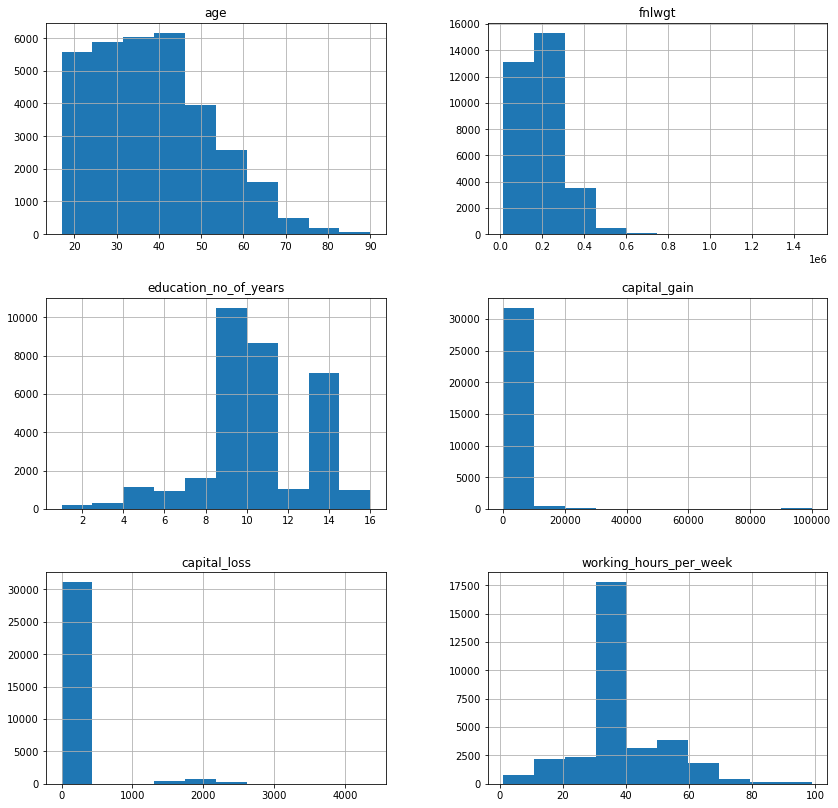

<IPython.core.display.Javascript object>

In [33]:
# creating histograms
df_clean[numeric_cols].hist(figsize=(14, 14))
plt.show()

* `age`: Average age of people in the dataset is 38 years, age has a wide range from 17 to 90 years.Age has a wide range of distribution in the interval of age ~ 18-90 years. From the distribution of this variable, we can observe that most of the people are aged around 25 - 40 years. We can infer from this data that the NGO is helping the adults to make the life of underprivileged people so that they can contribute in the overall development of the nation.  
* `education_no_of_years`: The average education in years is 10 years. There's a large difference between the minimum value and 25th percentile which indicates that there might be outliers present in this variable.
* `capital_gain`: There's a huge difference in the 75th percentile and maximum value of capital_gain indicating the presence of outliers. Also, 75% of the observations are 0.
* `capital_loss`: Same as capital gain there's a huge difference in the 75th percentile and maximum value indicating the presence of outliers. Also, 75% of the observations are 0.
* `working_hours_per_week`: On average people work for 40 hours a week. A vast difference in minimum value and 25th percentile, as well as 75th percentile and the maximum value, indicates that there might be outliers present in the variable.
* `fnlwght`: fnlwght is right-skewed. It has lots of outliers on the right side which we can cap.
* `working_hours_per_week`: Most of the data is concentrated around 40 working hours this gives a sense that most of the observations in data might be salaried employees working 8hrs 5 days a week. Some of the observations are clear outliers like working  1 hour a week which needs to be treated.
* `workclass`: ~70% of the observations are from the Private sector working class.
* `marita_status`: 47.3% of the observations in the dataset are married followed by 32.8% of the people who never married.
* `race`: * 94% of the people are native to north_america followed by 2.1% Asians.

* Private sector employees work for more hours to get a salary above 50K.
* There's large variability in the working hours of self-employed people which makes sense as they might be working at their ease.

**Bivariate Analysis:**
* `salary vs sex`: ~25% of the males have salary >50K whereas only ~15% of the females have salary >50K.



* `salary vs age`: 

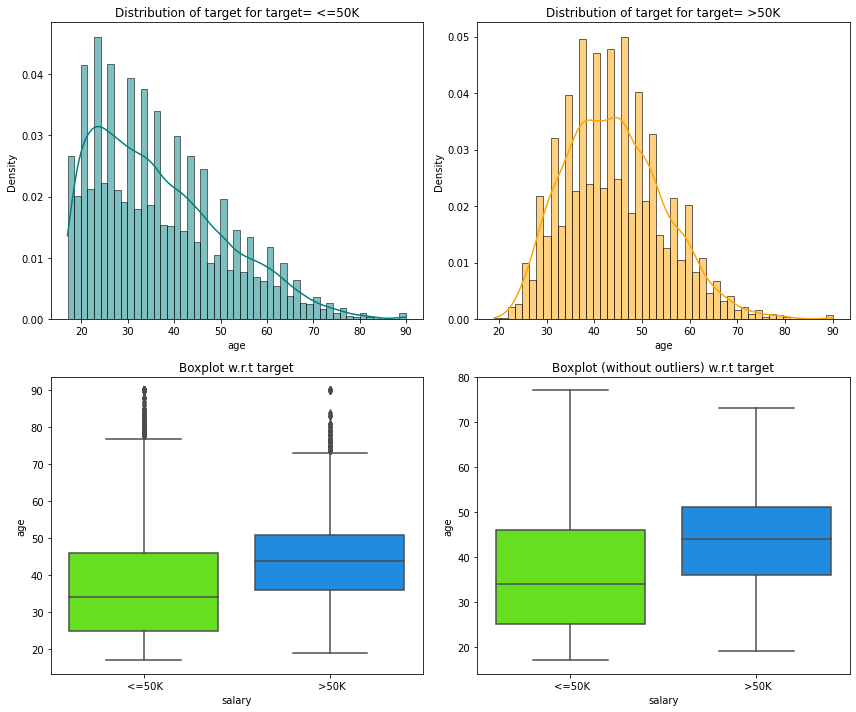

<IPython.core.display.Javascript object>

In [34]:
distribution_plot_wrt_target(df_clean, "age", "salary")

* People who more than 50K salary are generally older having an average age of around 48 years.
* People who have less than 50K salary have an average age of around 36.

* `salary vs occupation`: - 

salary               <=50K   >50K    All
occupation                              
All                  24720   7841  32561
 Exec-managerial      2098   1968   4066
 Prof-specialty       2281   1859   4140
 Sales                2667    983   3650
 Craft-repair         3170    929   4099
 Adm-clerical         3263    507   3770
 Transport-moving     1277    320   1597
 Tech-support          645    283    928
 Machine-op-inspct    1752    250   2002
 Protective-serv       438    211    649
Unknown               1652    191   1843
 Other-service        3158    137   3295
 Farming-fishing       879    115    994
 Handlers-cleaners    1284     86   1370
 Armed-Forces            8      1      9
 Priv-house-serv       148      1    149
------------------------------------------------------------------------------------------------------------------------


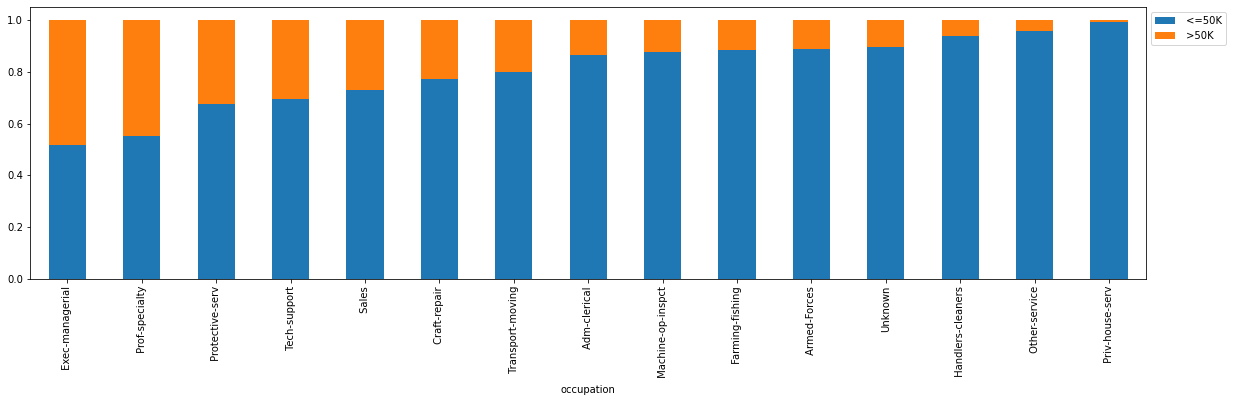

<IPython.core.display.Javascript object>

In [35]:
stacked_barplot(df_clean, "occupation", "salary")

* ~50% of the people whose occupation is of Executive Manager, Professor-speciality have a salary above 50,000 dollars. People with occupations like Private house service,handlers-cleaners, farming-fishing have a higher likelihood of having below 50K salary.


* `salary vs education`:

salary          <=50K   >50K    All
education                          
All             24720   7841  32561
 Bachelors       3134   2221   5355
 HS-grad         8826   1675  10501
 Some-college    5904   1387   7291
 Masters          764    959   1723
 Prof-school      153    423    576
 Assoc-voc       1021    361   1382
 Doctorate        107    306    413
 Assoc-acdm       802    265   1067
 10th             871     62    933
 11th            1115     60   1175
 7th-8th          606     40    646
 12th             400     33    433
 9th              487     27    514
 5th-6th          317     16    333
 1st-4th          162      6    168
 Preschool         51      0     51
------------------------------------------------------------------------------------------------------------------------


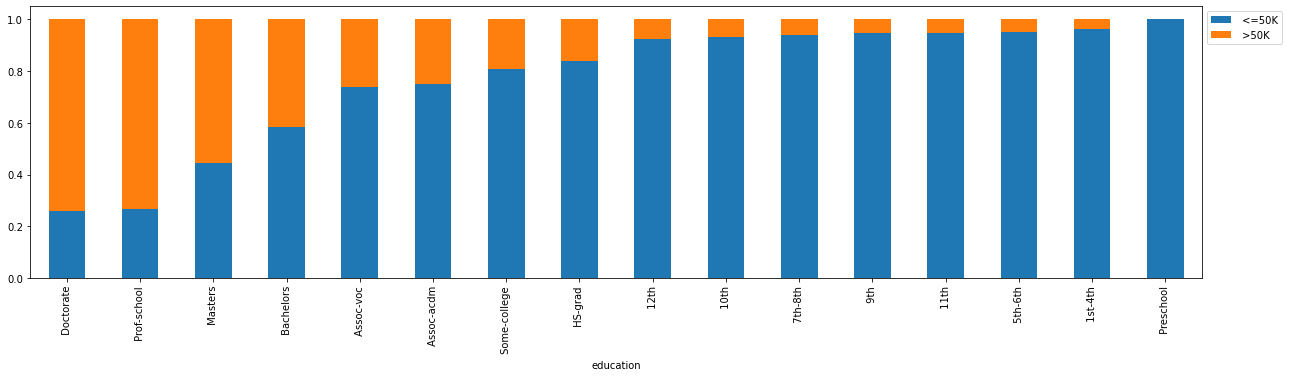

<IPython.core.display.Javascript object>

In [36]:
stacked_barplot(df_clean, "education", "salary")

* ~70% of the people of are Doctorate, graduate from Professional school program (Prof-school) have a salary above 50K dollars



* `salary vs workclass`: 


salary              <=50K   >50K    All
workclass                              
All                 24720   7841  32561
 Private            17733   4963  22696
 Self-emp-not-inc    1817    724   2541
 Self-emp-inc         494    622   1116
 Local-gov           1476    617   2093
 Federal-gov          589    371    960
 State-gov            945    353   1298
Unknown              1645    191   1836
 Never-worked           7      0      7
 Without-pay           14      0     14
------------------------------------------------------------------------------------------------------------------------


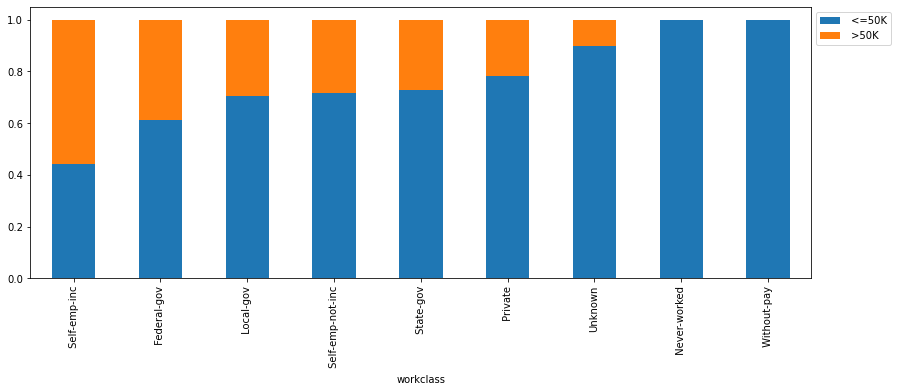

<IPython.core.display.Javascript object>

In [37]:
stacked_barplot(df_clean, "workclass", "salary")

* ~50% of the self-employed people have a salary above 50K followed by ~40% of the federal govt employee who has salary more than 50K. ~20% of the people working in the private sector earn more than 50K.


* `salary vs working_hours_per_week`:

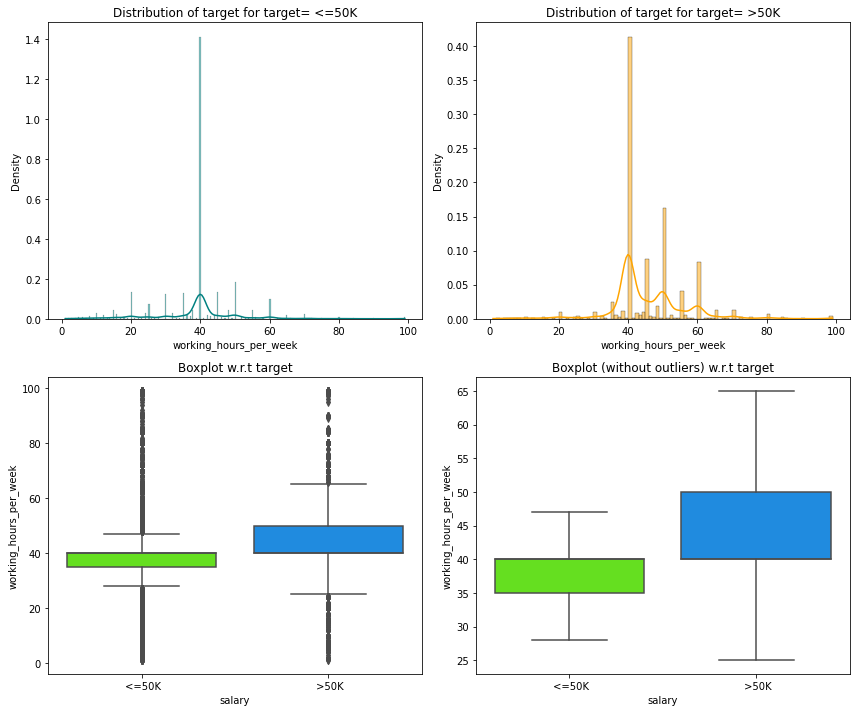

<IPython.core.display.Javascript object>

In [38]:
distribution_plot_wrt_target(df_clean, "working_hours_per_week", "salary")

* Majority of people having above 50K salary work around 40 hours per week.
    
* `salary vs native_country` : More than 90% of the people from south_america are likely to have <=50k Salary. From asia and europe, around 70% of the people have <=50k salary.    

### Actions for data pre-processing:

* Many variables have outliers that need to be treated.
* We can drop capital_gain and capital_loss as most of the observations are 0 in these variables, and if the government already knows a person's capital gain or loss it will be easier for them to classify a person into a salary group.

### Data Pre-Processing

* Dropping capital_gain and capital_loss
* There are many outliers in the data which we will treat (perform capping of outliers).
* All the values smaller than the lower whisker will be assigned the value of the lower whisker, and all the values above the upper whisker will be assigned the value of the upper whisker.

**Dropping capital_gain and capital_loss**

In [39]:
data.drop(["capital_gain", "capital_loss"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

**Outliers detection using boxplot**

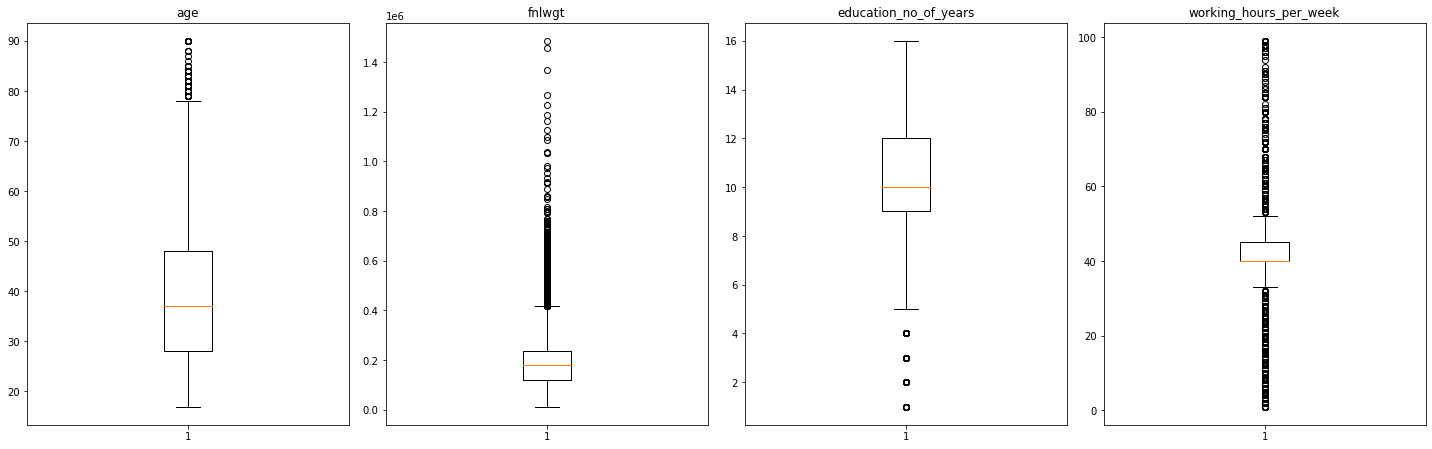

<IPython.core.display.Javascript object>

In [40]:
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* Age and fnlwgt have upper outliers. 
* education_no_years has lower outliers. 
* working_hours_per_week has both upper and lower outliers.

### Treating Outliers

In [41]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

<IPython.core.display.Javascript object>

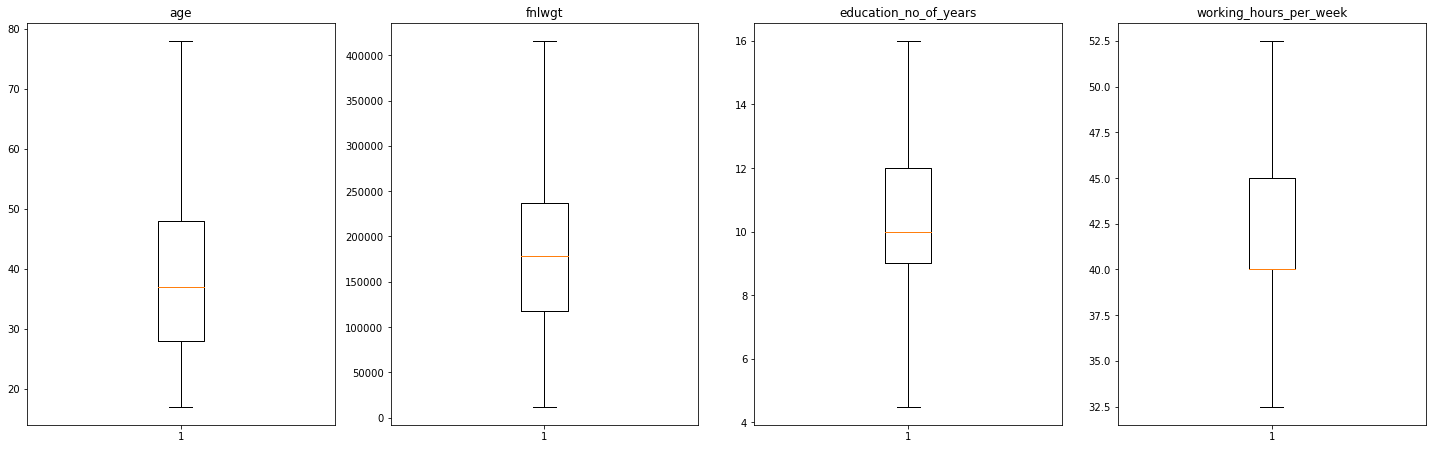

<IPython.core.display.Javascript object>

In [42]:
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
data = treat_outliers_all(data, numerical_col)
# let's look at box plot to see if outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Data Preparation

**Encoding >50K as 0 and <=50K as 1 as government wants to find underprivileged section of society.**

In [43]:
data["salary"] = data["salary"].apply(lambda x: 1 if x == " <=50K" else 0)

<IPython.core.display.Javascript object>

**Creating training and test sets.**

In [44]:
X = data.drop(["salary"], axis=1)
Y = data["salary"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

In [45]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (22792, 57)
Shape of test set :  (9769, 57)
Percentage of classes in training set:
1    0.753335
0    0.246665
Name: salary, dtype: float64
Percentage of classes in test set:
1    0.772853
0    0.227147
Name: salary, dtype: float64


<IPython.core.display.Javascript object>

### Building the model

### Model evaluation criterion

### Model can make wrong predictions as:
1. Predicting a person has a salary <=50K but in reality the salary of the person is >50K.
2. Predicting a person doesn't have a salary <=50K but in reality the salary of the person is <=50k.

### Which case is more important? 
* Both the cases are important as:

* If we predict a person has a salary <=50K but actually the salary is >50K then a wrong person will be getting the benefits of the scheme and government might lose resources.

* If we predict a person doesn't have a salary <=50K but actually the salary is <=50K that person will not be able to avail the benefits of the scheme constituting to opportunity loss.


### How to reduce this loss i.e need to reduce False Negatives?
*  `f1_score` should be maximized, the greater the f1_score higher the chances of identifying both the classes correctly.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn_with_threshold function will be used to check the model performance of models. 
* The confusion_matrix_sklearn_with_threshold function will be used to plot confusion matrix.

In [46]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf


<IPython.core.display.Javascript object>

In [47]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Logistic Regression

In [48]:
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data

lg = LogisticRegression(solver="newton-cg", random_state=1)
model = lg.fit(X_train, y_train)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

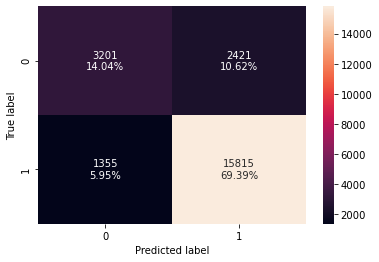

<IPython.core.display.Javascript object>

In [49]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_train, y_train)

In [50]:
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.834328,0.921083,0.867241,0.893351


<IPython.core.display.Javascript object>

#### Checking performance on test set

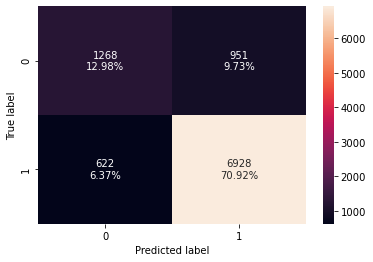

<IPython.core.display.Javascript object>

In [51]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_test, y_test)

In [52]:
log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test
)

print("Test set performance:")
log_reg_model_test_perf

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.83898,0.917616,0.879299,0.898049


<IPython.core.display.Javascript object>

#### ROC-AUC

* The area under the ROC curve (AUC) is a measure of how good a model is - The higher the AUC, the better the model is, at distinguishing between classes.

#### 1.  predict_proba

Predicts the probabilities for the class 0 and 1. 

**Input**: Train or test data 

**Output**: Returns the predicted probabilities for class 0 and 1

#### 2. roc_curve_score 

Returns the auc scores

**Input**: 
         1. Training data
         2. Predicted Probability
         
**Output**: AUC scores between 0 and 1
 
#### 3. roc_curve

Returns the fpr, tpr and threshold values which takes the original data and predicted probabilities for the class 1.
 
**Input:** 
        1. Training data
        2. Predicted Probability
        
**Output:** False positive rate, true positive rate and threshold values

* ROC-AUC on training set

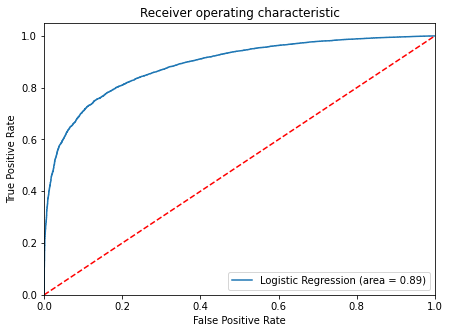

<IPython.core.display.Javascript object>

In [53]:
# Find the roc auc score for training data
logit_roc_auc_train = roc_auc_score(
    y_train, lg.predict_proba(X_train)[:, 1]
)  # The indexing represents predicted probabilities for class 1
# Find fpr, tpr and threshold values
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])
plt.figure(figsize=(7, 5))
# Plot roc curve
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* ROC-AUC on test set

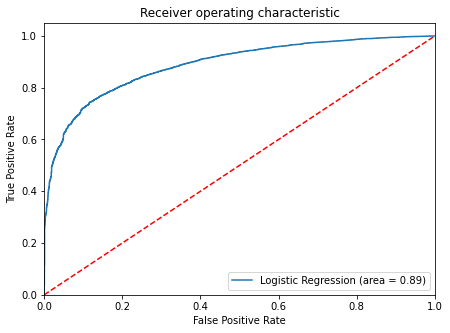

<IPython.core.display.Javascript object>

In [54]:
# Find the roc auc score for training data
logit_roc_auc_test = roc_auc_score(
    y_test, lg.predict_proba(X_test)[:, 1]
)  # The indexing represents predicted probabilities for class 1
# Find fpr, tpr and threshold values
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(X_test)[:, 1])
plt.figure(figsize=(7, 5))
# Plot roc curve
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Model is giving a generalized performance.

### Model Performance Improvement

* Let's see if the f1 score can be improved further, by changing the model threshold using AUC-ROC Curve.

### Optimal threshold using AUC-ROC curve

Optimal thresold is the value that best separated the True positive rate and False positive rate. 



In [55]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
# roc_curve returns the fpr, tpr and threshold values which takes the original data and predicted probabilities for the class 1.
fpr, tpr, thresholds = roc_curve(
    y_train, lg.predict_proba(X_train)[:, 1]
)  # The indexing represents predicted probabilities for class 1

optimal_idx = np.argmax(
    tpr - fpr
)  # Finds the index that contains the max difference between tpr and fpr
optimal_threshold_auc_roc = thresholds[
    optimal_idx
]  # stores the optimal threshold value
print(optimal_threshold_auc_roc)

0.7757843488056327


<IPython.core.display.Javascript object>

#### Checking model performance on training set

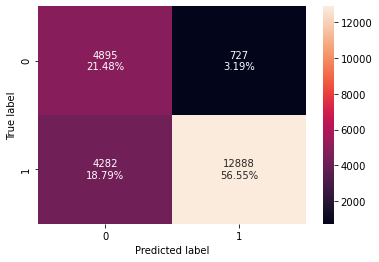

<IPython.core.display.Javascript object>

In [56]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)

In [57]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.78023,0.750612,0.946603,0.837291


<IPython.core.display.Javascript object>

#### Checking model performance on test set

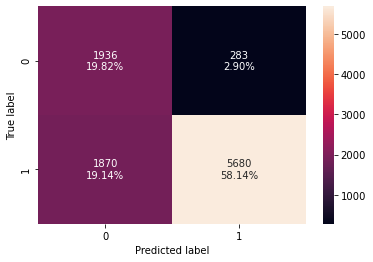

<IPython.core.display.Javascript object>

In [58]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)

In [59]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)
print("Test set performance:")
log_reg_model_test_perf_threshold_auc_roc

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.779609,0.752318,0.952541,0.840672


<IPython.core.display.Javascript object>

* The precision of the model for both training and test set has improved but the F1 score has reduced.

#### Let's use Precision-Recall curve and see if we can find a better threshold

The Precision-Recall curve shows the tradeoff between Precision and Recall for different thresholds. It can be used to select optimal threshold as required to improve the model improvement. 

#### precision_recall_curve()

Returns the fpr, tpr and threshold values

**Input:** 
        1. Original data
        2. Predicted Probability
        
**Output:** False positive rate, true positive rate and threshold values

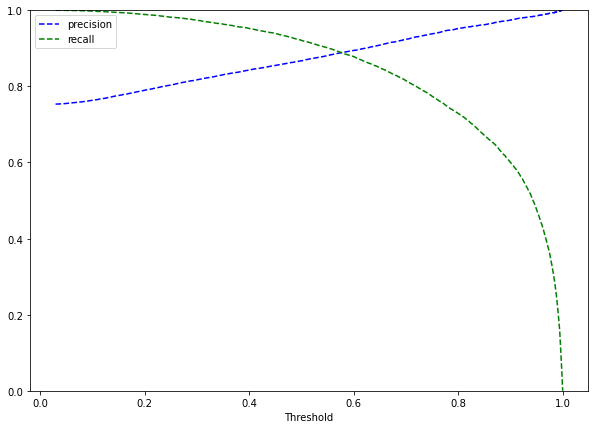

<IPython.core.display.Javascript object>

In [60]:
# Find the predicted probabilities for class 1
y_scores = lg.predict_proba(X_train)[:, 1]
# Find fpr, tpr and threshold values
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
# Plot recall precision curve
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At the threshold of 0.58, we get balanced recall and precision.

In [61]:
# setting the threshold
optimal_threshold_curve = 0.58

<IPython.core.display.Javascript object>

#### Checking model performance on training set

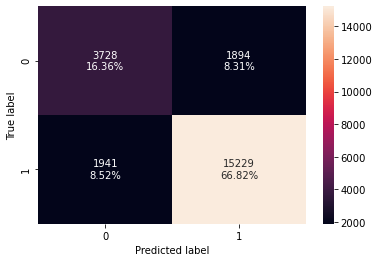

<IPython.core.display.Javascript object>

In [62]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)

In [63]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.831739,0.886954,0.889389,0.88817


<IPython.core.display.Javascript object>

#### Checking model performance on test set

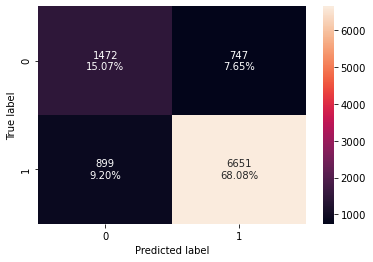

<IPython.core.display.Javascript object>

In [64]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)

In [65]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)
print("Test set performance:")
log_reg_model_test_perf_threshold_curve

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.831508,0.880927,0.899027,0.889885


<IPython.core.display.Javascript object>

* Model is performing well on training and test.
* There's not much improvement in the model performance as the default threshold is 0.50 and here we get 0.58 as the optimal threshold.

### Model Performance Summary

In [66]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.77 Threshold",
    "Logistic Regression-0.58 Threshold",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.77 Threshold,Logistic Regression-0.58 Threshold
Accuracy,0.834328,0.780230,0.831739
Recall,0.921083,0.750612,0.886954
Precision,0.867241,0.946603,0.889389
F1,0.893351,0.837291,0.888170


<IPython.core.display.Javascript object>

In [67]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.77 Threshold",
    "Logistic Regression-0.58 Threshold",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.77 Threshold,Logistic Regression-0.58 Threshold
Accuracy,0.838980,0.779609,0.831508
Recall,0.917616,0.752318,0.880927
Precision,0.879299,0.952541,0.899027
F1,0.898049,0.840672,0.889885


<IPython.core.display.Javascript object>

### Conclusion
- We have been able to build a predictive model that can be used by the government to find the citizens having less than 50K salary with an f1_score of 0.89 on the training set and formulate policies accordingly. 
- From the analysis, factors like age, working hours per week will lead to decrease in chances of a person having <=50K salary and workclass, occupations like private house servive, other services will lead to increase in chances of a person having <=50K salary.


### Recommendations

- The government should promote education among citizens, they should make policies to make education accessible to all, as we saw in our analysis that people who have higher education are more likely to have a salary above 50,000 Dollars. 
- Working hours is one of the significant predictors of salary, The government should implement laws to ensure that people are paid fairly for their work and are not overworked for the increase in salaries. This would improve work-life balance.
- People who invest more are more likely to have a salary above 50k, government should initiate investment schemes and facilitate ease of investment so that people can plan and invest in resources.
- As we saw in our analysis that Asian-Pac-Islander and White people are paid more than other races, there should be reforms to ensure that the salary criterion of employees is independent of their race.
- Reforms should be made for private-sector employees so that they are paid fairly for their work.
- Policy formulated by the government should be considerate of equal pay and counter the pay gap that exists in society.

## <a id='link1'>Appendix</a>

#### Univariate Analysis on Numerical data

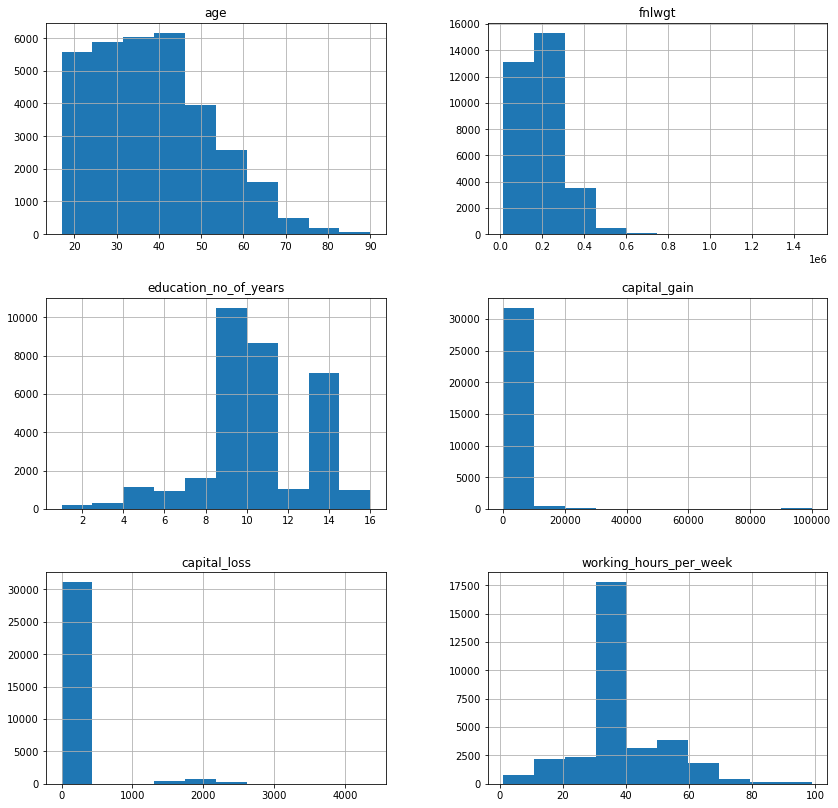

<IPython.core.display.Javascript object>

In [68]:
# creating histograms
df_clean[numeric_cols].hist(figsize=(14, 14))
plt.show()

**Observations**

* **Age** has a wide range of distribution in the interval of age ~ 18-90 years. From the distribution of this variable, we can observe that most of the people are aged around 25 - 40 years. We can infer from this data that the NGO is helping the adults to make the life of underprivileged people so that they can contribute in the overall development of the nation.  
* **fnlwgt** has a skewed distribution. It indicates that the weights assigned by CPS lie in the range 0.1-0.7. 
* The distribution of the **education_no_of_year** indicates that most of the people have at least 8-11 years of education. 
* **capital_gain** indicates that for most people investment gain and less than 10000. 
* **capital_loss** distribution shows that most people do not have a loss of more than 300. There are few people who have investment loss of around 2000. 
* The distribution of **working_hours_per_week** indicates that the people work for around 40-50 hours every week and there are some exceptions who work even more than 50 hours. 



#### Univariate Analysis on Categorical data

workclass


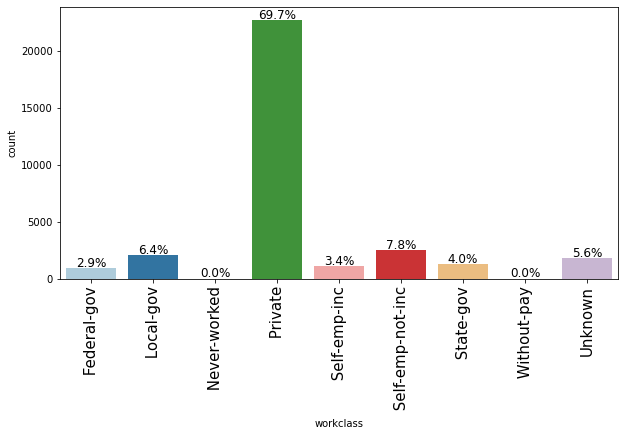

 ****************************************************************** 
education


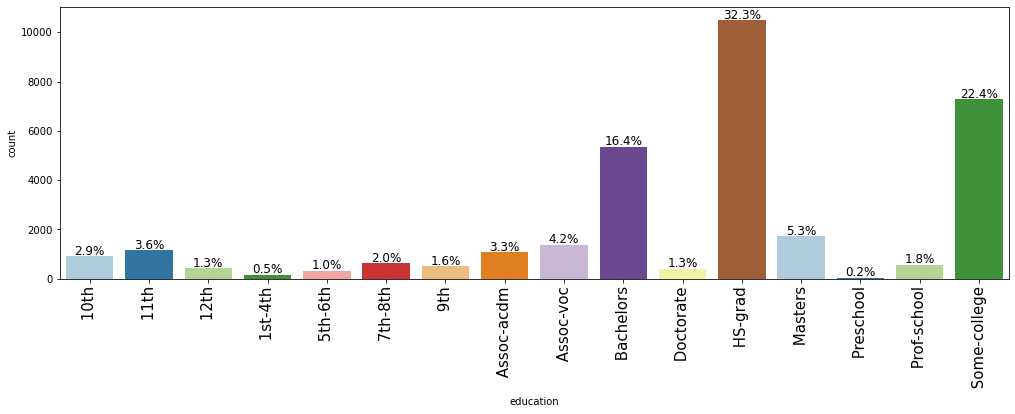

 ****************************************************************** 
marital_status


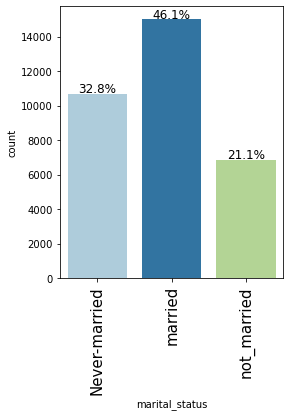

 ****************************************************************** 
occupation


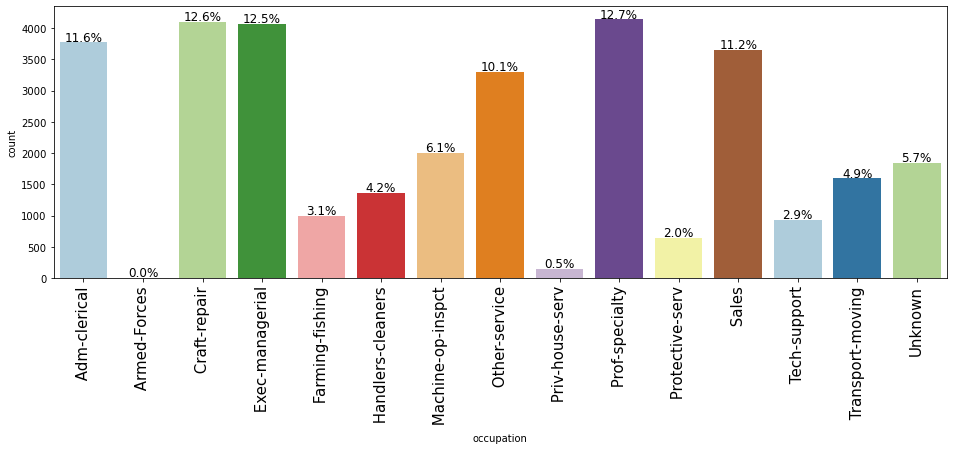

 ****************************************************************** 
relationship


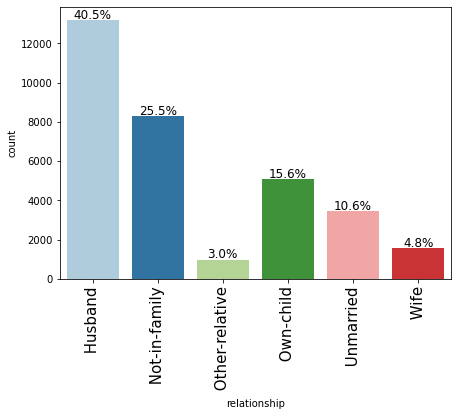

 ****************************************************************** 
race


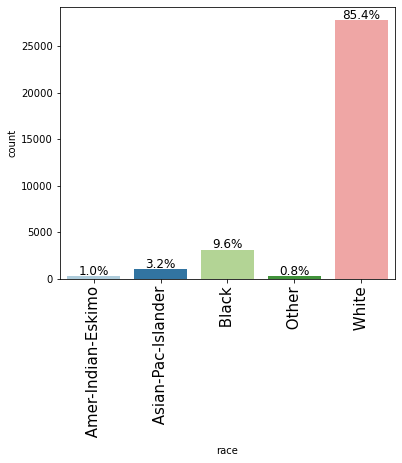

 ****************************************************************** 
sex


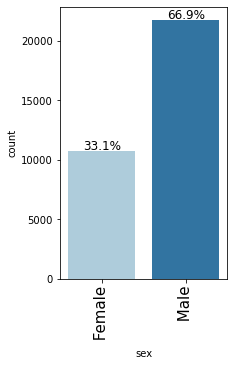

 ****************************************************************** 
native_country


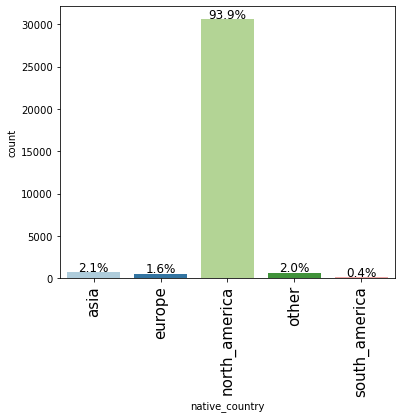

 ****************************************************************** 
salary


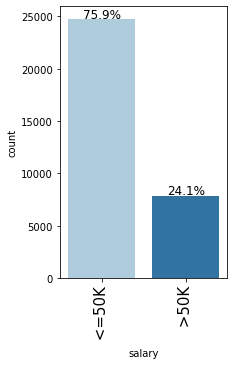

 ****************************************************************** 


<IPython.core.display.Javascript object>

In [69]:
## Barplot for the categorical features
for i in cat_cols:
    print(i)
    labeled_barplot(df_clean, i, perc=True)
    plt.show()
    print(
        " ****************************************************************** "
    )  ## To create a separator

**Observations**

* According to the **workclass** feature, ~70% of the observations are from the Private sector working class. As expected from the number of hours per week.
* From the **education** column it can be inferred that more than 50% of the observations are at least HS grads or have gone to some college. 
* In the **marital_status** feature, 46.1% of the observations in the dataset are married followed by 32.8% of the people who never married.
* The **Occupation** of people is some clerical work, sales, or service-based. 
* The **relationship**
* The **race** of 85% of the observations is white. 
* The **sex** of the 67% of the population is male and the remaining are female. 
* 94% of the people are **native_country** to north_america followed by 2.1% Asians.
* 24% of the observations have a **salary** above 50K and while 76% have a salary below 50K


### Bivariate Analysis

**Correlation Plot**

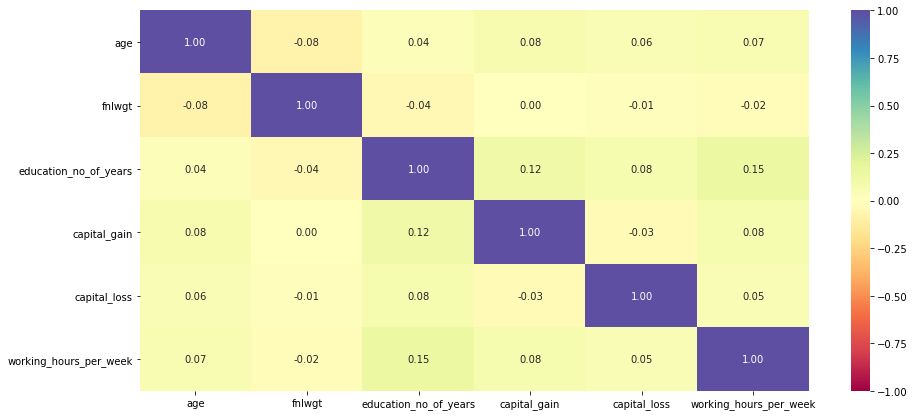

<IPython.core.display.Javascript object>

In [70]:
plt.figure(figsize=(15, 7))
sns.heatmap(df_clean.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* There is no significant correlation between the columns.

**Exploring the categorical data with respect to the target**

salary           <=50K   >50K    All
native_country                      
All              24720   7841  32561
north_america    23275   7313  30588
asia               465    206    671
other              501    162    663
europe             369    152    521
south_america      110      8    118
------------------------------------------------------------------------------------------------------------------------


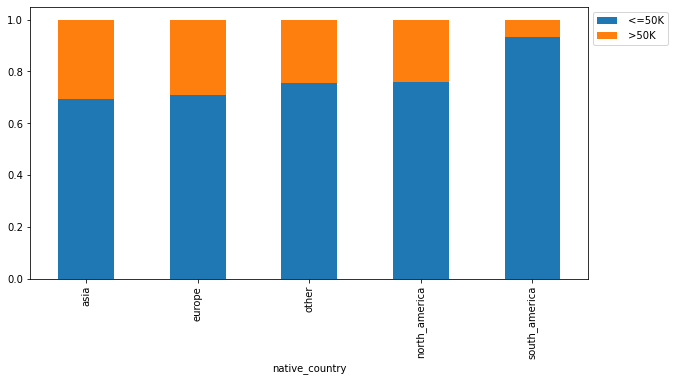

<IPython.core.display.Javascript object>

In [71]:
stacked_barplot(df_clean, "native_country", "salary")

* More than 90% of the people from south_america are likely to have <=50k Salary. From asia and europe, around 70% of the people have <=50k salary.

**Sex vs Salary**

salary    <=50K   >50K    All
sex                          
All       24720   7841  32561
 Male     15128   6662  21790
 Female    9592   1179  10771
------------------------------------------------------------------------------------------------------------------------


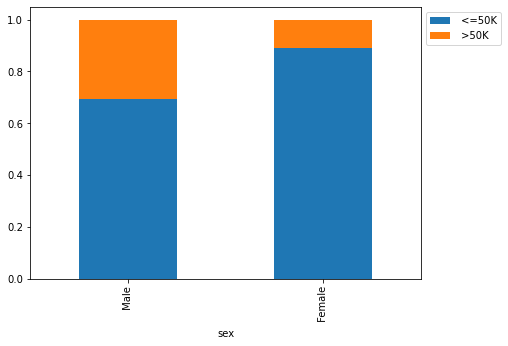

<IPython.core.display.Javascript object>

In [72]:
stacked_barplot(df_clean, "sex", "salary")

* ~25% of the males have salary >50K whereas only ~15% of the females have salary >50K.
* This shows the pay gap that exists in society and the government should investigate further on it to formulate policy to ensure equal pay.

**Salary vs education**

salary          <=50K   >50K    All
education                          
All             24720   7841  32561
 Bachelors       3134   2221   5355
 HS-grad         8826   1675  10501
 Some-college    5904   1387   7291
 Masters          764    959   1723
 Prof-school      153    423    576
 Assoc-voc       1021    361   1382
 Doctorate        107    306    413
 Assoc-acdm       802    265   1067
 10th             871     62    933
 11th            1115     60   1175
 7th-8th          606     40    646
 12th             400     33    433
 9th              487     27    514
 5th-6th          317     16    333
 1st-4th          162      6    168
 Preschool         51      0     51
------------------------------------------------------------------------------------------------------------------------


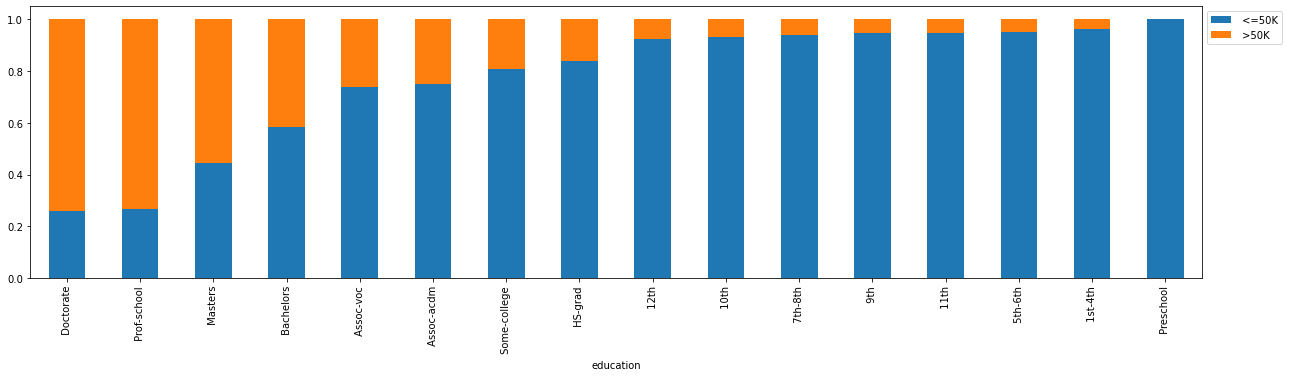

<IPython.core.display.Javascript object>

In [73]:
stacked_barplot(df_clean, "education", "salary")

* ~70% of the people of are Doctorate, graduate from Professional school program (Prof-school) have a salary above $50K.
* This clearly shows a positive relationship between education and salary, the higher the education higher is the salary.

**Salary vs occupation**

salary               <=50K   >50K    All
occupation                              
All                  24720   7841  32561
 Exec-managerial      2098   1968   4066
 Prof-specialty       2281   1859   4140
 Sales                2667    983   3650
 Craft-repair         3170    929   4099
 Adm-clerical         3263    507   3770
 Transport-moving     1277    320   1597
 Tech-support          645    283    928
 Machine-op-inspct    1752    250   2002
 Protective-serv       438    211    649
Unknown               1652    191   1843
 Other-service        3158    137   3295
 Farming-fishing       879    115    994
 Handlers-cleaners    1284     86   1370
 Armed-Forces            8      1      9
 Priv-house-serv       148      1    149
------------------------------------------------------------------------------------------------------------------------


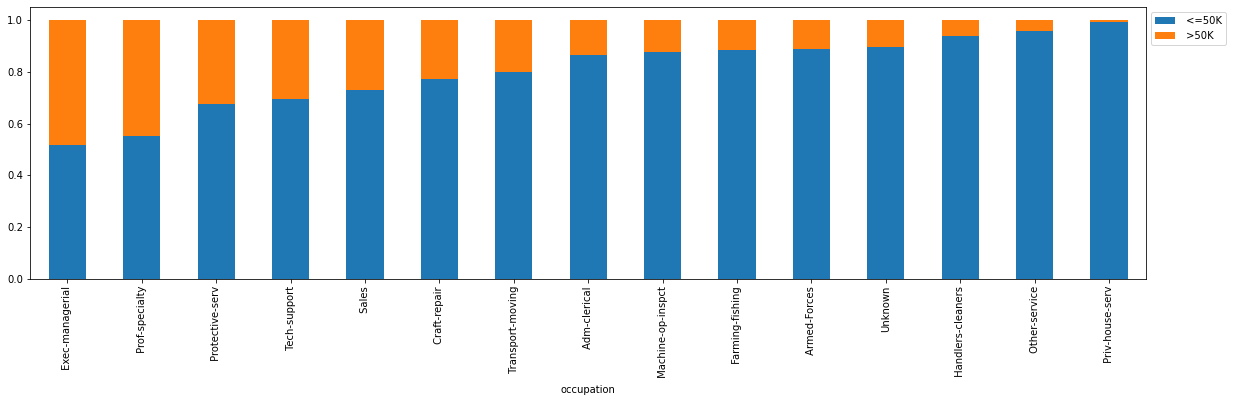

<IPython.core.display.Javascript object>

In [74]:
stacked_barplot(df_clean, "occupation", "salary")

- ~50% of the people whose occupation is of Executive Manager, Professor-speciality have a salary above $50,000
- People with occupations like Private house service,handlers-cleaners, farming-fishing have a higher likelihood of having below 50K salary.

**Salary vs race**

salary                <=50K   >50K    All
race                                     
All                   24720   7841  32561
 White                20699   7117  27816
 Black                 2737    387   3124
 Asian-Pac-Islander     763    276   1039
 Amer-Indian-Eskimo     275     36    311
 Other                  246     25    271
------------------------------------------------------------------------------------------------------------------------


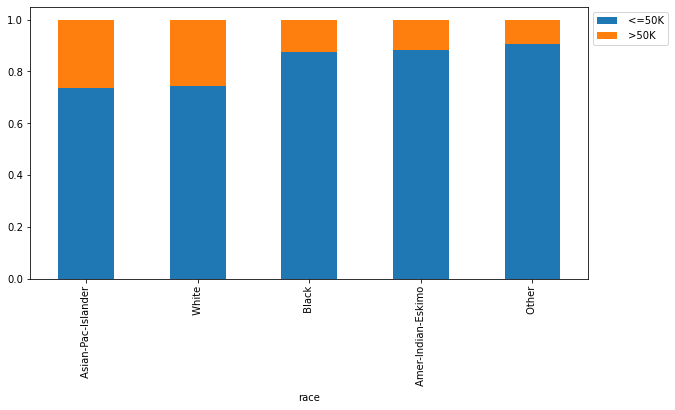

<IPython.core.display.Javascript object>

In [75]:
stacked_barplot(df_clean, "race", "salary")

* 25% of the White and Asia-Pacific people have a salary more than 50K salary as compared to people from other race.

**Salary vs workclass**

salary              <=50K   >50K    All
workclass                              
All                 24720   7841  32561
 Private            17733   4963  22696
 Self-emp-not-inc    1817    724   2541
 Self-emp-inc         494    622   1116
 Local-gov           1476    617   2093
 Federal-gov          589    371    960
 State-gov            945    353   1298
Unknown              1645    191   1836
 Never-worked           7      0      7
 Without-pay           14      0     14
------------------------------------------------------------------------------------------------------------------------


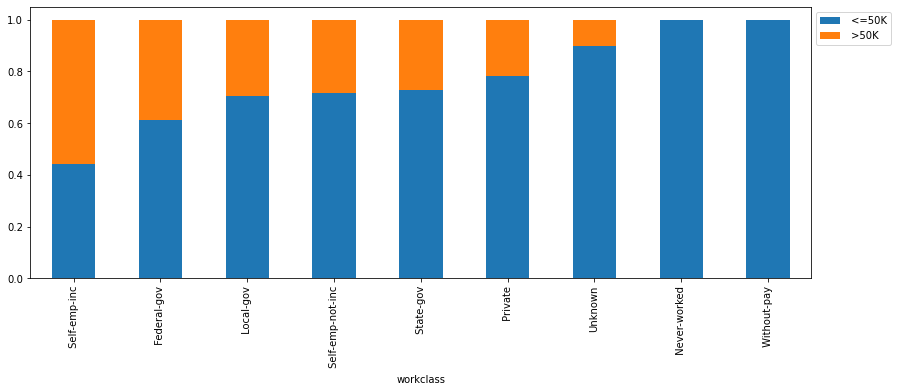

<IPython.core.display.Javascript object>

In [76]:
stacked_barplot(df_clean, "workclass", "salary")

* ~50% of the self-employed people have a salary above 50K followed by ~40% of the federal govt employee who has salary more than 50K.
* ~20% of the people working in the private sector earn more than 50K.

**Salary vs marital_status**

salary           <=50K   >50K    All
marital_status                      
All              24720   7841  32561
married           8297   6702  14999
not_married       6231    648   6879
Never-married    10192    491  10683
------------------------------------------------------------------------------------------------------------------------


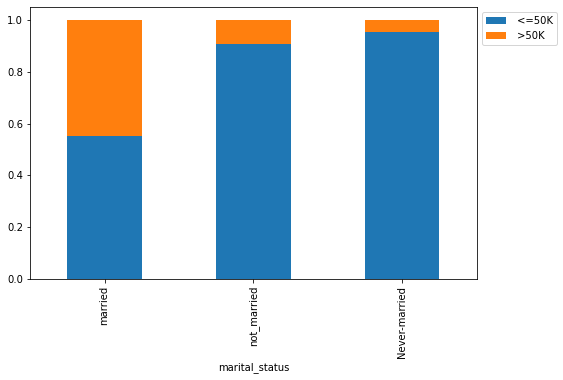

<IPython.core.display.Javascript object>

In [77]:
stacked_barplot(df_clean, "marital_status", "salary")

* Married people have a higher likelihood of getting a salary above 50K compared to Never Married and Not married people.

**Exploring the categorical data with respect to the target**

**Salary vs age**

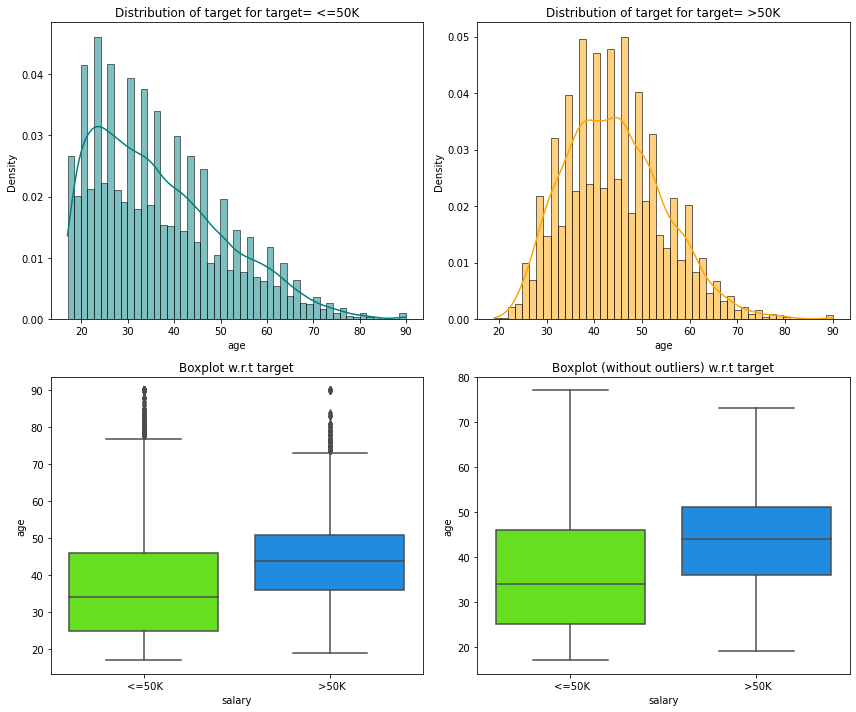

<IPython.core.display.Javascript object>

In [78]:
distribution_plot_wrt_target(df_clean, "age", "salary")

* People who more than 50K salary are generally older having an average age of around 48 years.
* People who have less than 50K salary have an average age of around 36.

**Salary vs working_hours_per_week**

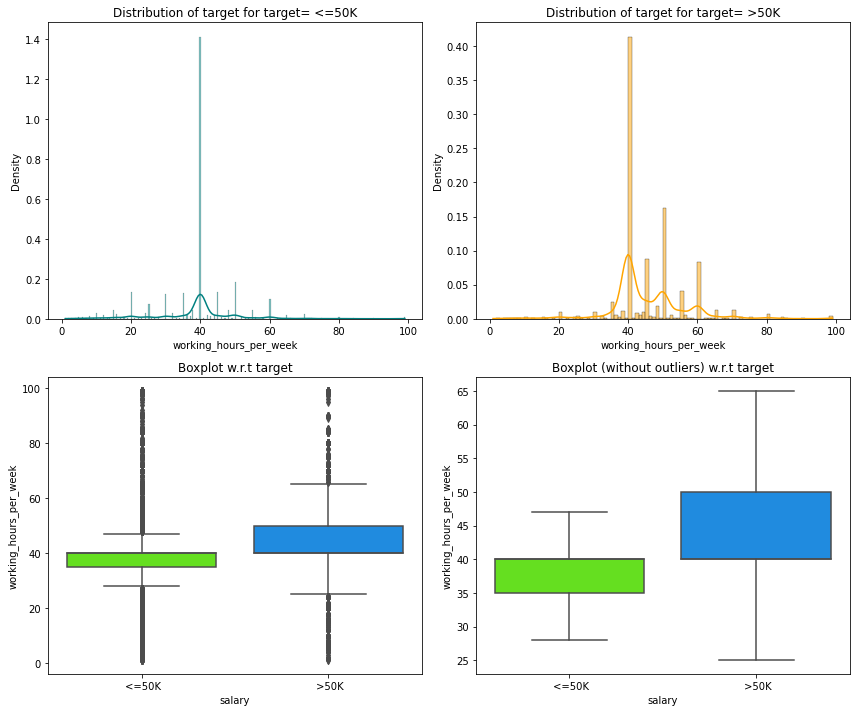

<IPython.core.display.Javascript object>

In [79]:
distribution_plot_wrt_target(df_clean, "working_hours_per_week", "salary")

* Majority of people having above 50K salary work around 40 hours per week.
* Those having >50K salary have a higher range of working hours as compared to the ones with <=50K, but there are outliers present.

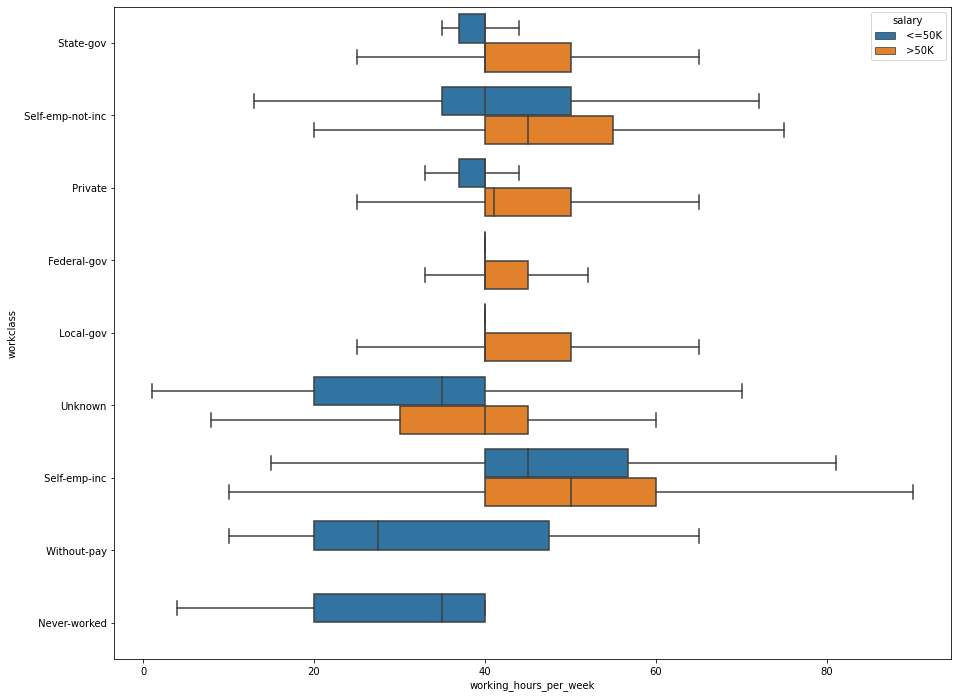

<IPython.core.display.Javascript object>

In [80]:
# lets see how working hours per week vary across different occupation
plt.figure(figsize=(15, 12))
sns.boxplot(
    y="workclass",
    x="working_hours_per_week",
    data=df_clean,
    hue="salary",
    showfliers=False,
)
plt.show()

* Private sector employees work for more hours to get a salary above 50K.
* There's large variability in the working hours of self-employed people which makes sense as they might be working at their ease.
* Without pay and never worked will have no income or less than 50K income.
* The number of working hours for many government employees is concentrated at 40 hrs a week, which makes sense as government employees generally have fixed working hours.

### To jump back to the EDA summary section, click [here](#eda).